# Proyek 2 Sistem Rekomendasi :
- **Nama:** Muhammad Rakha Almasah
- **Email:** muh.rakha.al@gmail.com
- **ID Dicoding:** muhrakhaal

#**Data Understanding**

Pada tahap ini, saya memahami struktur dan karakteristik data dari tiga file yang digunakan:

1. Books.csv
2. Ratings.cs
3. Users.csv

Berikut adalah penjelasan kode dan insight yang diperoleh:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Memuat Dataset**

Dataset yang dimuat:

Books.csv: Informasi tentang buku (judul, penulis, tahun publikasi, penerbit, dan URL gambar).

Ratings.csv: Data rating buku yang diberikan oleh pengguna.

Users.csv: Informasi tentang pengguna, termasuk lokasi dan usia.

In [ ]:
books = pd.read_csv('/content/Books.csv')
ratings = pd.read_csv('/content/Ratings.csv')
users = pd.read_csv('/content/Users.csv')

<ipython-input-2-013a2cca4fde>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/content/Books.csv')


## **Memahami Dataset Books**

Hasil:
1. Dataset Books memiliki 271,360 entri dan 8 kolom.
2. Tidak ada duplikasi data.
3. Ada beberapa nilai NaN:
  - Book-Author: 2 nilai kosong.
  - Publisher: 2 nilai kosong.
  - Image-URL-L: 3 nilai kosong.

Insight:
Informasi buku sebagian besar lengkap, tetapi terdapat beberapa data kosong pada kolom Book-Author dan Publisher, yang perlu ditangani pada tahap preprocessing.

In [ ]:
print(books.shape)
print('Jumlah Data Buku : ', len(ratings['ISBN'].unique()))
print(books.columns)

(271360, 8)
Jumlah Data Buku :  340556
Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')


In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,3462017942,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/042509474X.0...,http://images.amazon.com/images/P/042509474X.0...,http://images.amazon.com/images/P/006091985X.0...
freq,1,27,632,13903,7535,2,2,2


In [ ]:
print("Jumlah duplikasi: ", books.duplicated().sum())
print(books.isnull().sum())

Jumlah duplikasi:  0
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


## **Memahami Dataset Ratings**

Hasil:
1. Dataset Ratings memiliki 1,149,780 entri dan 3 kolom:
  - User-ID: ID pengguna.
  - ISBN: ID buku.
  - Book-Rating: Nilai rating yang diberikan pengguna.
2. Tidak ada duplikasi atau nilai kosong.

Insight: Dataset ini cukup lengkap tanpa masalah data yang hilang.
Terdapat 105,283 pengguna unik yang memberikan rating untuk buku.

In [ ]:
print(ratings.shape)
print('Jumlah Data Rating : ', len(ratings['User-ID'].unique()))
print(ratings.columns)

(1149780, 3)
Jumlah Data Rating :  105283
Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [ ]:
print("Jumlah duplikasi: ", ratings.duplicated().sum())
print(ratings.isnull().sum())

Jumlah duplikasi:  0
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


## **Memahami Dataset Users**

Hasil:
1. Dataset Users memiliki 278,858 entri dan 3 kolom:
  - User-ID: ID pengguna.
  - Location: Lokasi pengguna.
  - Age: Usia pengguna (kolom ini mengandung nilai kosong).
2. Tidak ada duplikasi data.
3. Kolom Age memiliki 110,762 nilai kosong.

Insight: Sebagian besar data pengguna lengkap, tetapi kolom Age memiliki banyak nilai kosong yang perlu ditangani.

In [ ]:
print(users.shape)
print('Jumlah Data Users : ', len(users['User-ID'].unique()))
print(users.columns)

(278858, 3)
Jumlah Data Users :  278858
Index(['User-ID', 'Location', 'Age'], dtype='object')


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [ ]:
print("Jumlah duplikasi: ", users.duplicated().sum())
print(users.isnull().sum())

Jumlah duplikasi:  0
User-ID          0
Location         0
Age         110762
dtype: int64


## **Insight Keseluruhan:**

1. Dataset Books, Ratings, dan Users cukup besar, dengan lebih dari 1 juta rating dari 105,283 pengguna unik untuk 271,360 buku.
2. Ada beberapa masalah data yang perlu diperbaiki:
  - Nilai kosong pada kolom Book-Author, Publisher, dan Age.
3. Dataset ini cukup kaya untuk membangun sistem rekomendasi, baik berbasis konten maupun collaborative filtering.

# **Data Preprocessing dan Data Preparation**
Pada tahap ini, data dari file Books.csv, Ratings.csv, dan Users.csv diproses lebih lanjut untuk memastikan kelengkapan, konsistensi, dan kompatibilitas antar dataset.

Berikut penjelasan setiap langkah dan hasilnya:


## **Memeriksa dan Membersihkan Serta Menghapus Kolom yang Tidak Diperlukan di Dataset Books**
Hasil:
1. Dataset Books memiliki nilai kosong di kolom:
  - Book-Author (2 nilai).
  - Publisher (2 nilai).
  - Image-URL-L (3 nilai).
2. Nilai kosong dihapus menggunakan dropna(), sehingga dataset menjadi bersih dari nilai NaN.
3. Kolom Image-URL-S, Image-URL-M, dan Image-URL-L dihapus karena tidak relevan untuk analisis dan rekomendasi.

Insight:
1. Menghapus baris dengan nilai kosong adalah pendekatan yang sederhana untuk memastikan integritas data.
2. Penghapusan kolom ini membantu mengurangi ukuran dataset dan mempermudah proses analisis selanjutnya.


In [ ]:
print("Jumlah nilai NaN di setiap kolom sebelum dibersihkan:")
print(books.isnull().sum())

Jumlah nilai NaN di setiap kolom sebelum dibersihkan:
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


In [ ]:
print("\nBaris dengan nilai NaN:")
print(books[books.isnull().any(axis=1)])


Baris dengan nilai NaN:
              ISBN                                         Book-Title  \
118033  0751352497                           A+ Quiz Masters:01 Earth   
128890  193169656X                                        Tyrant Moon   
129037  1931696993                                    Finders Keepers   
187689  9627982032  The Credit Suisse Guide to Managing Your Perso...   
209538  078946697X  DK Readers: Creating the X-Men, How It All Beg...   
220731  2070426769  Peuple du ciel, suivi de 'Les Bergers\";Jean-M...   
221678  0789466953  DK Readers: Creating the X-Men, How Comic Book...   

            Book-Author Year-Of-Publication  \
118033              NaN                1999   
128890  Elaine Corvidae                2002   
129037  Linnea Sinclair                2001   
187689              NaN                1995   
209538             2000   DK Publishing Inc   
220731             2003           Gallimard   
221678             2000   DK Publishing Inc   

             

In [ ]:
books_cleaned = books.dropna()

In [ ]:
print("\nJumlah nilai NaN di setiap kolom setelah dibersihkan:")
print(books_cleaned.isnull().sum())


Jumlah nilai NaN di setiap kolom setelah dibersihkan:
ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64


In [ ]:
books_cleaned = books_cleaned.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'])

In [ ]:
books_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271353 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271353 non-null  object
 1   Book-Title           271353 non-null  object
 2   Book-Author          271353 non-null  object
 3   Year-Of-Publication  271353 non-null  object
 4   Publisher            271353 non-null  object
dtypes: object(5)
memory usage: 12.4+ MB


## **Memeriksa dan Membersihkan Dataset Users**
Hasil:
1. Kolom Age memiliki 110,762 nilai kosong dan dihapus karena banyaknya data yang hilang.
2. Dataset Users menjadi bersih tanpa nilai NaN.

Insight: Menghapus kolom Age adalah pilihan yang tepat karena jumlah nilai kosong terlalu banyak untuk diprediksi atau diisi dengan nilai default.


In [ ]:
print("Jumlah nilai NaN di setiap kolom sebelum dibersihkan:")
print(users.isnull().sum())

Jumlah nilai NaN di setiap kolom sebelum dibersihkan:
User-ID          0
Location         0
Age         110762
dtype: int64


In [ ]:
users_cleaned = users.drop(columns=['Age'])

In [ ]:
print("\nJumlah nilai NaN di setiap kolom setelah penghapusan kolom Age:")
print(users_cleaned.isnull().sum())


Jumlah nilai NaN di setiap kolom setelah penghapusan kolom Age:
User-ID     0
Location    0
dtype: int64


## **Menggabungkan dan Menyimpan Dataset**

Hasil:
1. Dataset Ratings digabungkan dengan Books berdasarkan kolom ISBN.
2. Dataset hasil penggabungan ini kemudian digabungkan dengan Users berdasarkan kolom User-ID.
3. Dataset gabungan memiliki 1,031,128 entri dan 8 kolom:
  - User-ID: ID pengguna.
  - ISBN: ID buku.
  - Book-Rating: Rating yang diberikan pengguna.
  - Book-Title, Book-Author, Year-Of-Publication, Publisher: Informasi buku.
  - Location: Lokasi pengguna.
4. Dataset gabungan disimpan dengan nama Ratings_Books_Users_Cleaned.csv untuk digunakan pada tahap berikutnya.

Insight:
1. Dataset gabungan ini lengkap dan siap digunakan untuk proses modeling sistem rekomendasi.
2. Dataset yang sudah dibersihkan dan digabungkan sangat kaya informasi, menghubungkan pengguna, buku, dan rating dalam satu kerangka kerja.

In [ ]:
ratings_books = ratings.merge(books_cleaned, on='ISBN', how='inner')

In [ ]:
ratings_books_users = ratings_books.merge(users_cleaned, on='User-ID', how='inner')

In [ ]:
ratings_books_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031128 entries, 0 to 1031127
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   User-ID              1031128 non-null  int64 
 1   ISBN                 1031128 non-null  object
 2   Book-Rating          1031128 non-null  int64 
 3   Book-Title           1031128 non-null  object
 4   Book-Author          1031128 non-null  object
 5   Year-Of-Publication  1031128 non-null  object
 6   Publisher            1031128 non-null  object
 7   Location             1031128 non-null  object
dtypes: int64(2), object(6)
memory usage: 62.9+ MB


In [ ]:
ratings_books_users.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"tyler, texas, usa"
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,"seattle, washington, usa"
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,"h, new south wales, australia"
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,"rijeka, n/a, croatia"
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,"rijeka, n/a, croatia"


In [ ]:
ratings_books_users.to_csv("Ratings_Books_Users_Cleaned.csv", index=False)

## **Insight Keseluruhan Tahap 2:**
1. Dataset Books dan Users berhasil dibersihkan dari nilai kosong.
2. Dataset Books telah disederhanakan dengan menghapus kolom yang tidak relevan.
3. Dataset Ratings, Books, dan Users berhasil digabungkan, menghasilkan dataset yang kaya informasi dan siap untuk modeling.
4. Dataset gabungan disimpan untuk efisiensi, sehingga tidak perlu melakukan preprocessing ulang di setiap eksekusi.

# **Model Collaborative Filtering**

**Deskripsi Tahap:**

Pada tahap ini, saya membangun model rekomendasi berbasis Collaborative Filtering menggunakan PyTorch. Model ini mengandalkan embedding untuk pengguna dan buku guna memprediksi tingkat relevansi antara pengguna dan buku berdasarkan data historis rating.

**Penjelasan Kode:**
1. **Data Preparation:**
  - Dataset Ratings_Books_Users_Cleaned.csv dimuat dan diolah.
  - Dibuat indeks numerik untuk pengguna (user_idx) dan buku (book_idx) agar dapat diproses oleh model.
  - Rating buku dinormalisasi ke skala 0-1 untuk mempercepat konvergensi model.
2. **Visualisasi Aktivitas Pengguna:**
  - Menampilkan pengguna paling aktif dan paling jarang memberikan rating.
  - Plot horizontal untuk memvisualisasikan jumlah rating dari pengguna.
3. **Arsitektur Model:**
  - Model memiliki embedding untuk pengguna dan buku, dengan dimensi embedding yang ditentukan (embedding_dim = 100).
  - Embedding pengguna dan buku digabungkan, lalu diproses melalui lapisan fully connected (dense layer) dengan aktivasi ReLU.
  - Output akhir adalah nilai prediksi relevansi.
3. **Weighted Loss Function:**
  - Weighted Mean Squared Error digunakan sebagai fungsi loss untuk memberikan bobot lebih pada item dengan rating lebih tinggi.
4. **Training dan Validasi:**
  - Dataset dibagi menjadi data latih (80%) dan data validasi (20%).
  - Early stopping diterapkan untuk mencegah overfitting jika validasi loss tidak membaik selama beberapa epoch.
5. **Evaluasi Model:**
  - Plot perbandingan antara training loss dan validation loss untuk memvisualisasikan performa model selama training.
7. **Fungsi Rekomendasi:**
  - Mengambil data pengguna tertentu dan menampilkan 5 buku dengan rating tertinggi yang diberikan oleh pengguna tersebut.
  - Memberikan rekomendasi 10 buku yang relevan berdasarkan prediksi model.

**Insight dari Model Collaborative Filtering:**

1. **Visualisasi Pengguna:**
  - Grafik pengguna menunjukkan bahwa beberapa pengguna sangat aktif memberikan rating, sedangkan sebagian besar lainnya memberikan sedikit rating. Hal ini merupakan pola yang umum dalam dataset rekomendasi.
2. **Evaluasi Model:**
- Dengan early stopping, saya melihat bahwa training loss terus menurun, tetapi validation loss mulai meningkat setelah beberapa epoch. Ini menunjukkan bahwa model mulai overfit jika dilatih terlalu lama.
3. **Rekomendasi:**
- Fungsi rekomendasi menunjukkan kemampuan model untuk menyarankan buku yang relevan berdasarkan embedding pengguna dan buku. Buku-buku yang direkomendasikan didasarkan pada kesamaan pola rating di antara pengguna.

**Contoh Hasil Rekomendasi:**

**1. Pengguna dengan ID: 11676**
  - **Top 5 Buku yang Diberi Rating Tertinggi:**
    - MARBLE HEART oleh Gretta Mulrooney [Rating: 10.0].
    - His After Hours Mistress oleh Amanda Browning [Rating: 10.0].
    - ...
  - **Rekomendasi:**
    - Harry Potter and the Order of the Phoenix oleh J.K. Rowling.
    - Dude, Where’s My Country oleh Michael Moore.
    - ...
**2. Pengguna dengan ID: 153662**
  - **Top 5 Buku yang Diberi Rating Tertinggi:**
    - Second Sight oleh Unknown Author [Rating: 10.0].
    - Princess Diana: Her Life Story oleh Richard Buskin [Rating: 10.0].
    - ...
  - **Rekomendasi:**
    - Harry Potter and the Chamber of Secrets oleh J.K. Rowling.
    - Ender’s Game oleh Orson Scott Card.
    - ...

Dengan pendekatan ini, model berhasil memberikan rekomendasi yang relevan untuk berbagai pengguna berdasarkan historis rating mereka.

In [ ]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
data = pd.read_csv('Ratings_Books_Users_Cleaned.csv')

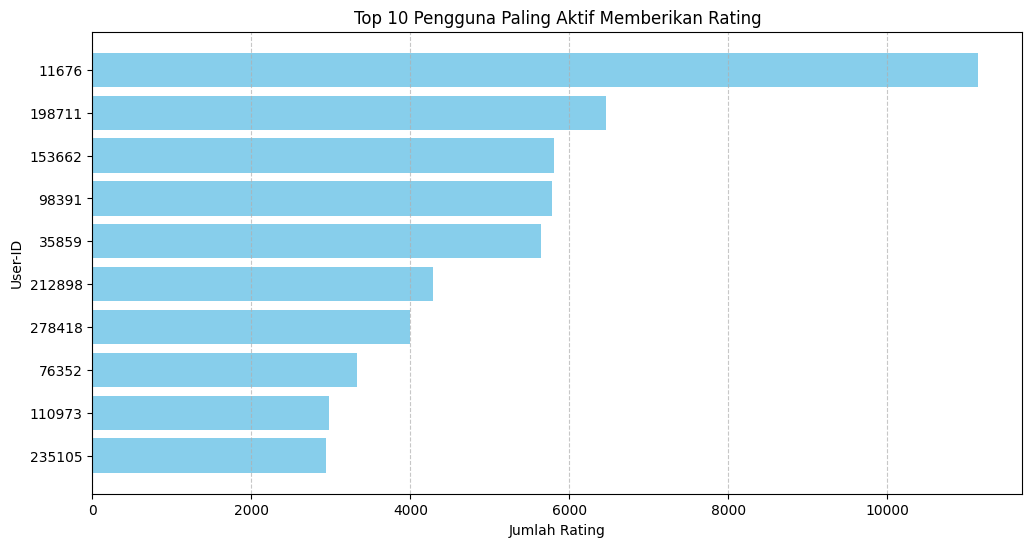

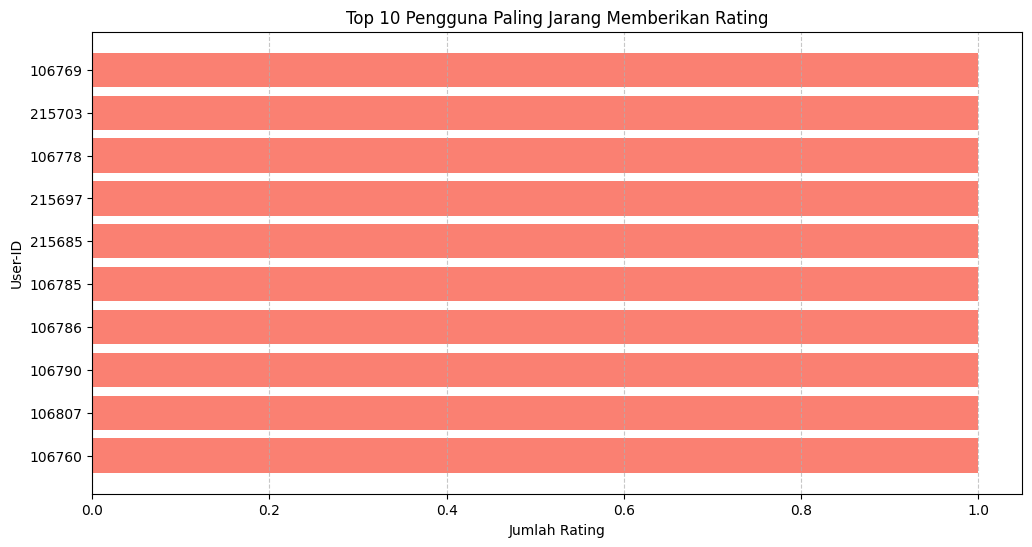

In [ ]:
user_activity = data.groupby('User-ID').size().reset_index(name='Rating Count')
top_active_users = user_activity.sort_values(by='Rating Count', ascending=False).head(10)
least_active_users = user_activity.sort_values(by='Rating Count', ascending=True).head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_active_users['User-ID'].astype(str), top_active_users['Rating Count'], color='skyblue')
plt.xlabel('Jumlah Rating')
plt.ylabel('User-ID')
plt.title('Top 10 Pengguna Paling Aktif Memberikan Rating')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
plt.barh(least_active_users['User-ID'].astype(str), least_active_users['Rating Count'], color='salmon')
plt.xlabel('Jumlah Rating')
plt.ylabel('User-ID')
plt.title('Top 10 Pengguna Paling Jarang Memberikan Rating')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
data['user_idx'] = data['User-ID'].astype('category').cat.codes.values
data['book_idx'] = data['ISBN'].astype('category').cat.codes.values

data['Book-Rating'] = data['Book-Rating'] / 10.0

X = data[['user_idx', 'book_idx']]
y = data['Book-Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train.values, dtype=torch.long)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [ ]:
def weighted_mse_loss(output, target):
    weight = torch.where(target > 0, 5.0, 1.0)
    loss = weight * (output - target) ** 2
    return loss.mean()

In [ ]:
class CollaborativeFilteringModel(nn.Module):
    def __init__(self, num_users, num_books, embedding_dim):
        super(CollaborativeFilteringModel, self).__init__()
        self.user_embedding = nn.Embedding(num_users, embedding_dim)
        self.book_embedding = nn.Embedding(num_books, embedding_dim)
        self.fc1 = nn.Linear(embedding_dim * 2, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, user_idx, book_idx):
        user_embedded = self.user_embedding(user_idx)
        book_embedded = self.book_embedding(book_idx)
        x = torch.cat([user_embedded, book_embedded], dim=-1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
num_users = data['user_idx'].nunique()
num_books = data['book_idx'].nunique()
embedding_dim = 100
model = CollaborativeFilteringModel(num_users, num_books, embedding_dim)

In [ ]:
criterion = weighted_mse_loss
optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-4)

In [ ]:
epochs = 50
batch_size = 256
patience = 3
best_val_loss = float('inf')
patience_counter = 0

training_losses = []
validation_losses = []

print("Training started...")
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for i in range(0, len(X_train_tensor), batch_size):
        batch_X = X_train_tensor[i:i+batch_size]
        batch_y = y_train_tensor[i:i+batch_size]
        user_idx = batch_X[:, 0]
        book_idx = batch_X[:, 1]
        outputs = model(user_idx, book_idx).squeeze()
        loss = criterion(outputs, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    avg_training_loss = epoch_loss / len(X_train_tensor)
    training_losses.append(avg_training_loss)

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for i in range(0, len(X_test_tensor), batch_size):
            batch_X = X_test_tensor[i:i+batch_size]
            batch_y = y_test_tensor[i:i+batch_size]
            user_idx = batch_X[:, 0]
            book_idx = batch_X[:, 1]
            outputs = model(user_idx, book_idx).squeeze()
            loss = criterion(outputs, batch_y)
            val_loss += loss.item()
    avg_val_loss = val_loss / len(X_test_tensor)
    validation_losses.append(avg_val_loss)

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {avg_training_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        patience_counter += 1
    if patience_counter >= patience:
        print("Early stopping triggered.")
        break

Training started...
Epoch 1/50, Training Loss: 0.0012, Validation Loss: 0.0011
Epoch 2/50, Training Loss: 0.0011, Validation Loss: 0.0010
Epoch 3/50, Training Loss: 0.0010, Validation Loss: 0.0010
Epoch 4/50, Training Loss: 0.0010, Validation Loss: 0.0010
Epoch 5/50, Training Loss: 0.0010, Validation Loss: 0.0010
Epoch 6/50, Training Loss: 0.0009, Validation Loss: 0.0011
Epoch 7/50, Training Loss: 0.0008, Validation Loss: 0.0011
Early stopping triggered.


In [ ]:
model.load_state_dict(torch.load('best_model.pth'))

<ipython-input-9-a4f87cfabb20>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


<All keys matched successfully>

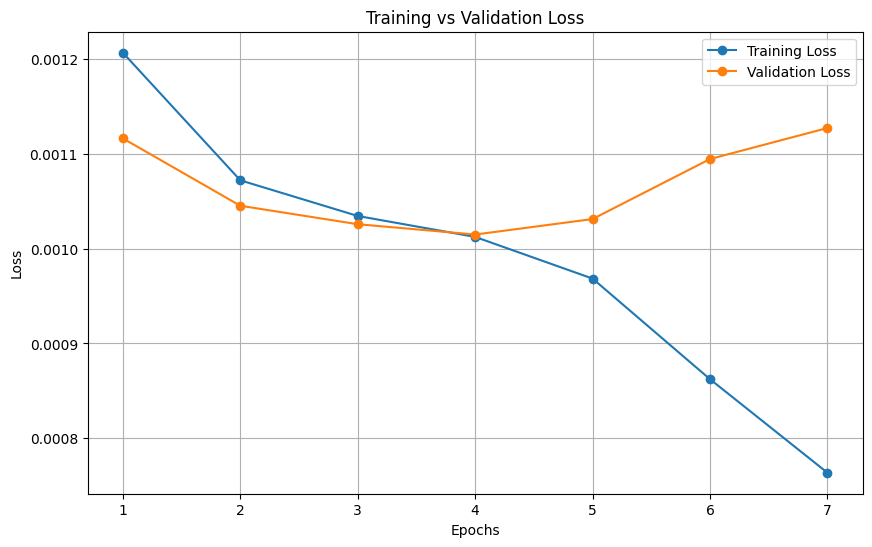

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(training_losses) + 1), training_losses, label='Training Loss', marker='o')
plt.plot(range(1, len(validation_losses) + 1), validation_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
def recommend_books_with_details(user_id, model, data, n=10):
    user_data = data[data['User-ID'] == user_id]
    top_rated_books = user_data.sort_values(by='Book-Rating', ascending=False).head(5)[['Book-Title', 'Book-Author', 'Publisher', 'Book-Rating']]
    user_idx = user_data['user_idx'].iloc[0]
    all_books = torch.tensor(data['book_idx'].unique(), dtype=torch.long)
    user_tensor = torch.tensor([user_idx] * len(all_books), dtype=torch.long)

    model.eval()
    with torch.no_grad():
        predictions = model(user_tensor, all_books).squeeze()

    top_books = torch.argsort(predictions, descending=True)[:n]
    book_indices = all_books[top_books].numpy()
    recommended_books = data[data['book_idx'].isin(book_indices)][['Book-Title', 'Book-Author', 'Publisher']].drop_duplicates()

    print(f"\n{'=' * 60}")
    print(f"{'Recommendations for User-ID: ' + str(user_id):^60}")
    print(f"{'=' * 60}\n")

    print(f"{'Top 5 Books Rated by User':^60}")
    print(f"{'-' * 60}")
    if top_rated_books.empty:
        print(f"{'No rated books found for this user.':^60}")
    else:
        for idx, row in top_rated_books.iterrows():
            print(f"- {row['Book-Title']} by {row['Book-Author']} ({row['Publisher']}) [Rating: {row['Book-Rating'] * 10:.1f}]")

    print(f"\n{'=' * 60}")
    print(f"{'Top ' + str(n) + ' Recommended Books':^60}")
    print(f"{'-' * 60}")
    for idx, row in recommended_books.head(n).iterrows():
        print(f"{idx+1:2}. {row['Book-Title']} by {row['Book-Author']} ({row['Publisher']})")
    print(f"{'=' * 60}\n")

In [ ]:
user_id = 11676
recommend_books_with_details(user_id, model, data, n=10)


             Recommendations for User-ID: 11676             

                 Top 5 Books Rated by User                  
------------------------------------------------------------
- MARBLE HEART by Gretta Mulrooney (Flamingo) [Rating: 10.0]
- His After Hours Mistress  (In Love With Her Boss) by Amanda Browning (Harlequin) [Rating: 10.0]
- Left In Trust (Harlequin Presents, No 1571) by Kay Thorpe (Harlequin) [Rating: 10.0]
- As Seen on TV by Sarah Mlynowski (Red Dress Ink) [Rating: 10.0]
- Up &amp; Out (Red Dress Ink) by Ariella Papa (Red Dress Ink) [Rating: 10.0]

                  Top 10 Recommended Books                  
------------------------------------------------------------
61. Harry Potter and the Order of the Phoenix (Book 5) by J. K. Rowling (Scholastic)
394. Harry Potter and the Chamber of Secrets (Book 2) by J. K. Rowling (Scholastic)
1323. Harry Potter and the Prisoner of Azkaban (Book 3) by J. K. Rowling (Scholastic)
2640. Dude, Where's My Country? by Michael Moor

# **Model Content-Based Filtering**

**Penjelasan Kode**

Pada tahap ini, saya membangun model *content-based filtering* untuk memberikan rekomendasi buku berdasarkan kemiripan konten, yaitu penulis buku (*author*). Penjelasan langkah-langkah berikut:

1. **Load Dataset**
   - Dataset yang digunakan terdiri dari tiga file: `Users.csv`, `Ratings.csv`, dan `Books.csv`.
   - Dataset digabungkan untuk mengintegrasikan informasi buku, rating, dan pengguna.

2. **Menggabungkan Dataset**
   - Menggabungkan dataset berdasarkan kolom `ISBN` untuk mendapatkan informasi buku lengkap dan kolom `User-ID` untuk menyelaraskan data pengguna.

3. **Pembersihan Data**
   - Mengecek data null (*missing values*) dan menghapus baris yang mengandung nilai kosong.
   - Dataset akhir hanya menyisakan informasi relevan seperti `Book-Title`, `Book-Author`, dan kolom lainnya yang digunakan untuk model.

4. **TF-IDF Vectorization**
   - Menerapkan *TF-IDF (Term Frequency-Inverse Document Frequency)* pada kolom `Book-Author` untuk menghitung bobot kata yang unik dalam nama penulis.
   - Hasil vektorisasi adalah matriks yang mewakili setiap penulis dalam bentuk vektor.

5. **Cosine Similarity**
   - Menghitung *cosine similarity* untuk mengukur kemiripan antar buku berdasarkan vektor TF-IDF.
   - Hasilnya adalah matriks kemiripan berbentuk persegi, di mana setiap nilai menunjukkan skor kemiripan antar dua buku.

6. **Fungsi Rekomendasi**
   - Membuat fungsi `get_book_recommendations` untuk memberikan rekomendasi buku.
   - Fungsi ini:
     - Mengambil judul buku sebagai input.
     - Mencari buku-buku dengan skor kemiripan tertinggi berdasarkan matriks kemiripan (*cosine similarity*).
     - Mengembalikan daftar buku yang mirip dengan judul input.

7. **Contoh Penggunaan**
   - Judul buku seperti *"Harry Potter a l'ecole des sorciers"* digunakan sebagai input.
   - Fungsi menghasilkan daftar buku yang mirip berdasarkan penulis.

**Hasil Visualisasi**

1. **Rekomendasi Berdasarkan Judul Buku**
   - Buku yang direkomendasikan berdasarkan judul *"Along Came a Spider (Alex Cross Novels)"*:
     - Buku yang memiliki penulis yang sama, seperti *James Patterson*, ditampilkan.
   - Buku yang direkomendasikan berdasarkan *"Harry Potter and the Order of the Phoenix"*:
     - Hasil menunjukkan buku-buku lain dari penulis *J.K. Rowling*, termasuk versi bahasa berbeda.

**Kelebihan Content-Based Filtering**
- Rekomendasi akurat untuk buku yang memiliki karakteristik serupa (penulis atau atribut konten lainnya).
- Tidak bergantung pada data pengguna lain sehingga cocok untuk pengguna baru yang memiliki sedikit data rating (*cold start problem*).

**Catatan**
Pendekatan ini efektif jika metadata buku, seperti nama penulis atau deskripsi, tersedia secara lengkap dan akurat. Namun, tidak memperhitungkan preferensi pengguna secara langsung.

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
users_path = '/content/Users.csv'
ratings_path = '/content/Ratings.csv'
books_path = '/content/Books.csv'

In [3]:
users_df = pd.read_csv(users_path)
ratings_df = pd.read_csv(ratings_path)
books_df = pd.read_csv(books_path)

<ipython-input-3-eb504086cc21>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv(books_path)


In [4]:
merged_books = books_df[['ISBN', 'Book-Title', 'Book-Author']].merge(ratings_df, on='ISBN')
merged_books = merged_books.merge(users_df, on='User-ID')

In [5]:
merged_books.head()

,ISBN,Book-Title,Book-Author,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,8,5,"timmins, ontario, canada",NaN
2,0002005018,Clara Callan,Richard Bruce Wright,11400,0,"ottawa, ontario, canada",49.0
3,0002005018,Clara Callan,Richard Bruce Wright,11676,8,"n/a, n/a, n/a",NaN
4,0002005018,Clara Callan,Richard Bruce Wright,41385,0,"sudbury, ontario, canada",NaN


In [6]:
merged_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031136 entries, 0 to 1031135
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   ISBN         1031136 non-null  object 
 1   Book-Title   1031136 non-null  object 
 2   Book-Author  1031134 non-null  object 
 3   User-ID      1031136 non-null  int64  
 4   Book-Rating  1031136 non-null  int64  
 5   Location     1031136 non-null  object 
 6   Age          753301 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 55.1+ MB


In [7]:
merged_books.isna().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
User-ID,0
Book-Rating,0
Location,0
Age,277835


In [8]:
print("Jumlah duplikasi: ", merged_books.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
merged_books = merged_books.dropna()

In [10]:
merged_books.isna().sum()

,0
ISBN,0
Book-Title,0
Book-Author,0
User-ID,0
Book-Rating,0
Location,0
Age,0


In [11]:
merged_books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 753299 entries, 0 to 1031135
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ISBN         753299 non-null  object 
 1   Book-Title   753299 non-null  object 
 2   Book-Author  753299 non-null  object 
 3   User-ID      753299 non-null  int64  
 4   Book-Rating  753299 non-null  int64  
 5   Location     753299 non-null  object 
 6   Age          753299 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 46.0+ MB


In [12]:
content_data = merged_books[['Book-Title', 'Book-Author']].drop_duplicates()

In [13]:
content_data.head()

,Book-Title,Book-Author
0,Classical Mythology,Mark P. O. Morford
2,Clara Callan,Richard Bruce Wright
16,Decision in Normandy,Carlo D'Este
19,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
32,The Kitchen God's Wife,Amy Tan


In [14]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(content_data['Book-Author'])

In [15]:
print(tfidf_matrix.shape)

(212544, 42508)


In [16]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [17]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=content_data['Book-Title'], columns=content_data['Book-Title'])

In [18]:
def get_book_recommendations(title, cosine_sim=cosine_sim_df, data=content_data, k=5):
    similar_books = cosine_sim[title].sort_values(ascending=False)[1:k+1]
    recommendations = data[data['Book-Title'].isin(similar_books.index)]
    return recommendations

In [26]:
title = "Harry Potter a l'ecole des sorciers"
recommendations = get_book_recommendations(title)
print(recommendations)

                                               Book-Title    Book-Author
114693     Harry Potter and the Sorcerer's Stone (Book 1)  J. K. Rowling
142493  Harry Potter and the Prisoner of Azkaban (Book 3)  J. K. Rowling
396999                  Harry Potter y el cÃ¡liz de fuego  J. K. Rowling
640259             Harry Potter et la chambre des secrets  J. K. Rowling
640270                Harry Potter a l'ecole des sorciers  J. K. Rowling
